# 🔌 Activation Functions 激活函数模块

---
## 🧮 什么是激活函数？

激活函数（Activation Function）是神经网络中每一层输出后应用的非线性函数。它的主要作用是：

- 引入**非线性**，使网络可以逼近复杂函数，而不仅仅是线性变换；
- 决定了神经元在某些输入下是否被“激活”，从而控制信息的流动；
- 帮助网络学习特征、加快收敛速度或改善训练效果。

一个典型的神经元输出计算如下：

$$
a = f(z) = f(w^\top x + b)
$$

其中 $f(\cdot)$ 就是激活函数，例如 ReLU、Sigmoid 等。

---

## 📚 常见激活函数：

| 类别         | 函数名                        | 特性与用途                              |
|--------------|-------------------------------|------------------------------------------|
| 📈 单调激活   | Sigmoid, Tanh                 | 早期常用，易导致梯度消失                 |
| 🔥 分段线性   | ReLU, Leaky ReLU, PReLU       | 现代标准，稀疏激活，效率高               |
| 📊 平滑非线性 | ELU, SELU                     | 有负值区间，带归一化能力                  |
| 🎯 输出函数   | Softmax, Sigmoid              | 多分类 / 二分类输出层                    |
| 🌈 新兴函数   | Swish, Mish                   | 新一代平滑激活，训练效果优秀             |

---


1. `Sigmoid` ➤ 最经典的激活函数（了解梯度消失）
2. `Tanh` ➤ 改进型 sigmoid，中心对称
3. `ReLU` ➤ 最常用函数，效率高
4. `Leaky ReLU / PReLU` ➤ 解决 ReLU 死神经元问题
5. `ELU / SELU` ➤ 适用于归一化神经网络
6. `Softmax` ➤ 多分类输出函数
7. `Swish / Mish` ➤ 新一代平滑激活，性能强大

---


# Sigmoid 激活函数

---

## 简介

Sigmoid 是最早用于神经网络的激活函数之一，形状类似 “S” 曲线，能将任意实数映射到 (0, 1) 区间。它在早期二分类模型（如 Logistic 回归）和浅层神经网络中应用广泛。

---

## 数学定义

Sigmoid 函数定义如下：

$$
f(x) = \sigma(x) = \frac{1}{1 + e^{-x}}
$$

---

## 导数推导

导数计算如下：

$$
f'(x) = \frac{d}{dx} \left( \frac{1}{1 + e^{-x}} \right)
= \frac{e^{-x}}{(1 + e^{-x})^2}
= \sigma(x)(1 - \sigma(x))
$$

这是它一个重要的性质，常用于反向传播：

$$
f'(x) = f(x)(1 - f(x))
$$

---

## 特性分析

| 属性             | 是否满足 |
|------------------|----------|
| 非线性           | ✅        |
| 单调性           | ✅        |
| 连续可导         | ✅        |
| 输出范围         | (0, 1)    |
| 是否中心化       | ❌（非0均值） |
| 饱和区间         | ✅（两端趋于常数） |
| 梯度消失风险     | 🟥 高     |

---

## 👍 优点

- 输出值始终在 (0, 1)，可看作概率，适合二分类输出
- 光滑连续，适合梯度优化
- 数学形式简单，容易求导

---

## 👎 缺点

- 容易导致**梯度消失**（输入较大时梯度趋于 0）
- 输出**非零均值**，容易导致权重更新偏移
- 收敛速度较慢，不适用于深层网络

---

## 常见用途

| 用法 | 场景                             |
|------|----------------------------------|
| 输出层 | 二分类神经网络输出层             |
| 内部层 | ❌（不推荐，用于隐藏层易导致梯度问题） |
| 逻辑建模 | Logistic 回归、概率建模        |

---

## 💬 常见面试问题

1. **Sigmoid 的梯度消失问题是怎么产生的？**
   - 因为在输入绝对值较大时（正负远离0），导数接近于0，反向传播时梯度会被“压缩”，导致深层网络学习困难。

2. **Sigmoid 为什么不适合隐藏层？**
   - 它的输出不是0均值，会造成权重更新偏移；再加上梯度消失问题，训练效率低。

3. **Sigmoid 和 Tanh 有什么关系？**
   - Tanh 是中心化的 Sigmoid，其表达式可以写作：
     $$
     \tanh(x) = 2\sigma(2x) - 1
     $$

4. **为什么仍然使用 Sigmoid 做输出层？**
   - 因为它将值映射到(0, 1)，适合作为概率输出，尤其在二分类中搭配 binary cross-entropy 使用。

---



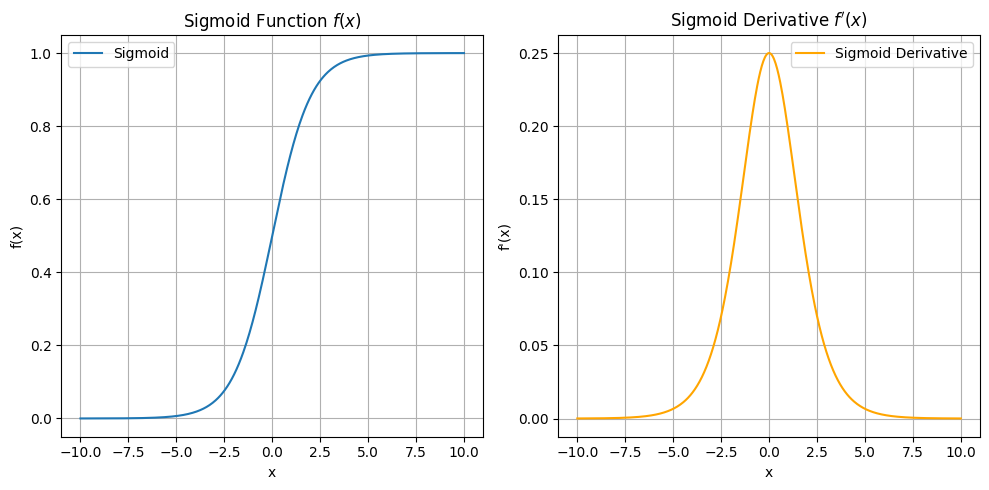

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def derivative_sigmoid(x):
  return sigmoid(x) * (1 - sigmoid(x))


# 🎨 可视化
x = np.linspace(-10, 10, 500)
y = sigmoid(x)
dy = derivative_sigmoid(x)

plt.figure(figsize=(10, 5))

# Sigmoid 曲线
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Sigmoid')
plt.title("Sigmoid Function $f(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()

# Sigmoid 导数曲线
plt.subplot(1, 2, 2)
plt.plot(x, dy, label="Sigmoid Derivative", color='orange')
plt.title("Sigmoid Derivative $f'(x)$")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 🧠 Tanh 激活函数

---

## 📌 简介

Tanh（双曲正切）函数是 Sigmoid 的改进版本，也是一种常见的 S 型激活函数。  
它将输入压缩到 $(-1, 1)$ 区间，相比 Sigmoid，其**输出是中心对称的**，因此在隐藏层中表现更优。

---

## 📐 数学定义

Tanh 函数定义如下：

$$
f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

也可以表示为 Sigmoid 的变形：

$$
\tanh(x) = 2 \cdot \sigma(2x) - 1
$$

---

## ✏️ 导数推导

导数为：

$$
f'(x) = 1 - \tanh^2(x)
$$

这是它的一个简洁而常用的性质，便于反向传播。

---

## 📊 特性分析

| 属性             | 是否满足 |
|------------------|----------|
| 非线性           | ✅        |
| 单调性           | ✅        |
| 连续可导         | ✅        |
| 输出范围         | (-1, 1)   |
| 是否中心化       | ✅        |
| 饱和区间         | ✅（两端趋于 ±1） |
| 梯度消失风险     | 🟨 中     |

---

## 👍 优点

- 相比 Sigmoid，**均值为 0**，可避免权重更新偏移
- 数学推导简洁，导数方便求解
- 在浅层网络和 RNN 中表现良好

---

## 👎 缺点

- **梯度消失问题仍然存在**，尤其在输入绝对值较大时
- 训练深层网络时性能不如 ReLU 系列

---

## 🧭 常见用途

| 用法     | 场景                                  |
|----------|---------------------------------------|
| 输出层   | 回归任务中将输出压缩到 (-1, 1)        |
| 隐藏层   | 小型网络、早期神经网络、RNN 等        |
| 替代 Sigmoid | 作为中心化激活函数改善梯度传播 |

---

## 💬 常见面试问题

1. **Tanh 与 Sigmoid 有什么关系？**
   - Tanh 是 Sigmoid 的缩放和平移版本：$\tanh(x) = 2\sigma(2x) - 1$，输出是中心对称的。

2. **Tanh 为什么比 Sigmoid 更适合做隐藏层激活？**
   - 因为 Tanh 的输出均值为 0，有助于梯度的传播和参数更新的稳定性。

3. **Tanh 有哪些缺点？**
   - 和 Sigmoid 一样存在梯度消失问题，尤其在 $x \gg 0$ 或 $x \ll 0$ 的区域。

4. **你会在什么时候使用 Tanh？**
   - 小型网络、RNN、或者你想让输出值落在 $(-1, 1)$ 区间时。

---


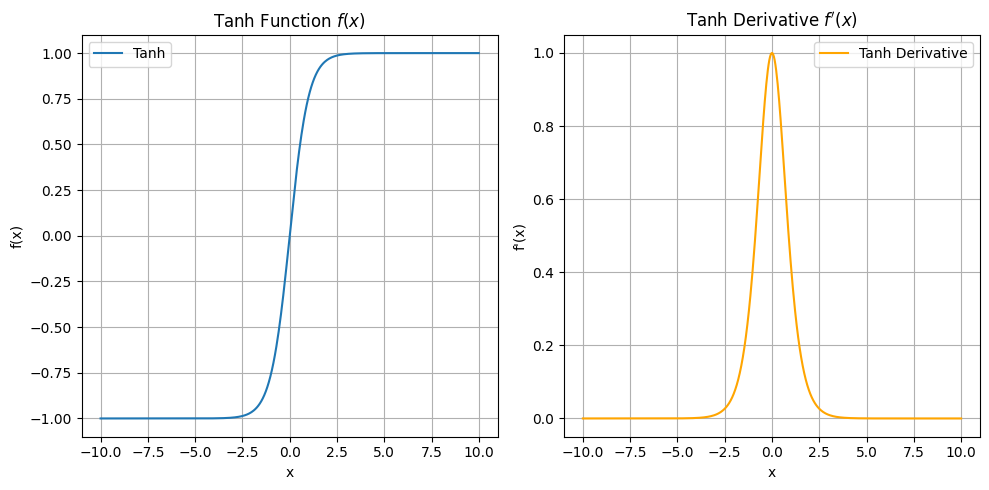

In [3]:
# 📦 Tanh 激活函数实现与可视化

import numpy as np
import matplotlib.pyplot as plt

# ✅ 正向传播
def tanh(x):
    return np.tanh(x)

# ✅ 反向传播（导数）
def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# 🎨 可视化
x = np.linspace(-10, 10, 500)
y = tanh(x)
dy = tanh_derivative(x)

plt.figure(figsize=(10, 5))

# Tanh 曲线
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Tanh')
plt.title("Tanh Function $f(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()

# Tanh 导数曲线
plt.subplot(1, 2, 2)
plt.plot(x, dy, label="Tanh Derivative", color='orange')
plt.title("Tanh Derivative $f'(x)$")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# ⚡ ReLU 激活函数

---

## 📌 简介

ReLU（修正线性单元）是目前最常用的激活函数之一，几乎成为深度神经网络的默认选择。  
它的形式非常简单：对于正数直接输出本身，对于负数输出 0。它非常高效，训练快，并具有稀疏激活的特性。

---

## 📐 数学定义

ReLU 函数定义如下：

$$
f(x) = \max(0, x)
$$

---

## ✏️ 导数推导

ReLU 在 $x=0$ 不可导，但在实际中通常取一侧导数：

$$
f'(x) =
\begin{cases}
1 & x > 0 \\\\
0 & x \leq 0
\end{cases}
$$

---

## 📊 特性分析

| 属性             | 是否满足 |
|------------------|----------|
| 非线性           | ✅        |
| 单调性           | ✅        |
| 连续性           | ✅        |
| 可导性           | 分段可导（$x=0$ 不严格可导） |
| 输出范围         | [0, ∞)    |
| 是否中心化       | ❌        |
| 稀疏性           | ✅        |
| 梯度消失风险     | ❌（小） 但存在“死亡”问题 |

---

## 👍 优点

- 实现简单，计算开销小
- 减少梯度消失问题（相比 Sigmoid / Tanh）
- **稀疏激活**（负值区域输出 0），有助于正则化
- 训练深层网络时非常稳定

---

## 👎 缺点

- **ReLU 死亡神经元问题**：当输入长期为负时，梯度为 0，神经元永远不会更新
- 非 0 均值，可能引起更新偏移（比 Sigmoid 好很多）

---

## 🧭 常见用途

| 用法     | 场景                        |
|----------|-----------------------------|
| 隐藏层   | 几乎所有 CNN、MLP、GAN 等中间层 |
| 输出层   | ❌（不用于输出）              |
| 替代 Sigmoid | 训练深层网络的标准激活函数  |

---

## 💬 常见面试问题

1. **ReLU 为什么比 Sigmoid / Tanh 更适合深层网络？**
   - 因为它不会在正区间发生梯度消失，能更有效地进行反向传播。

2. **什么是“ReLU 死亡神经元”问题？**
   - 如果神经元的输入长期小于 0，其输出与梯度始终为 0，导致该神经元永远不会更新。

3. **ReLU 有哪些改进版本？**
   - Leaky ReLU、PReLU、ELU、Mish 等，主要目的是修复负值区域的问题。

4. **你会在什么任务中用 ReLU？**
   - 除了输出层外，几乎所有任务（图像、文本、语音）中间层都优先选用 ReLU。

---


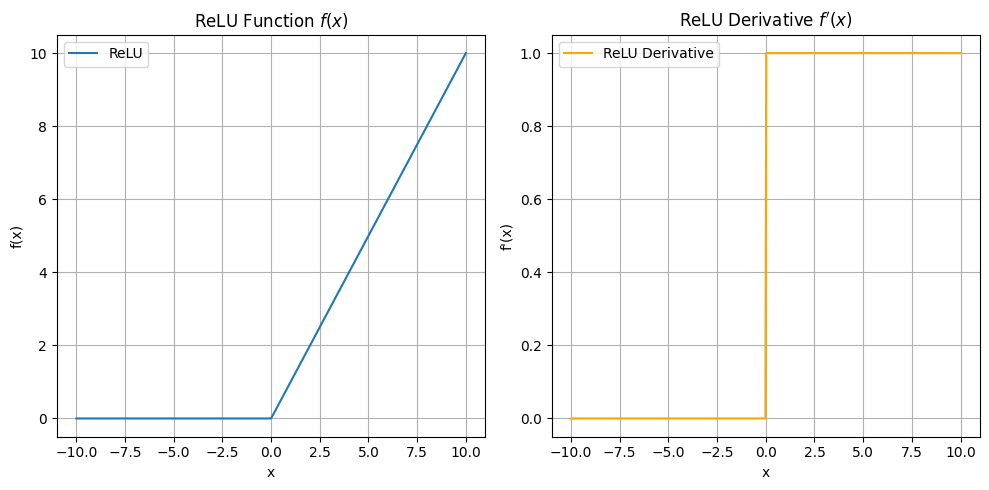

In [4]:
# ⚡ ReLU 激活函数实现与可视化

import numpy as np
import matplotlib.pyplot as plt

# ✅ 正向传播
def relu(x):
    return np.maximum(0, x)

# ✅ 反向传播（导数）
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# 🎨 可视化
x = np.linspace(-10, 10, 500)
y = relu(x)
dy = relu_derivative(x)

plt.figure(figsize=(10, 5))

# ReLU 函数图像
plt.subplot(1, 2, 1)
plt.plot(x, y, label='ReLU')
plt.title("ReLU Function $f(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()

# ReLU 导数图像
plt.subplot(1, 2, 2)
plt.plot(x, dy, label="ReLU Derivative", color='orange')
plt.title("ReLU Derivative $f'(x)$")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# 🧠 Leaky ReLU 激活函数

---

## 📌 简介

Leaky ReLU 是 ReLU 的改进版本，旨在解决其“死亡神经元”问题。  
它在负区间不再是恒为 0，而是引入一个很小的斜率 $\alpha$，使得神经元仍能保持一定梯度，避免在训练中完全失活。

---

## 📐 数学定义

设 $\alpha$ 是一个很小的正数（通常为 0.01），Leaky ReLU 定义为：

$$
f(x) =
\begin{cases}
x & \text{if } x > 0 \\\\
\alpha x & \text{if } x \leq 0
\end{cases}
$$

---

## ✏️ 导数推导

Leaky ReLU 的导数是分段常数：

$$
f'(x) =
\begin{cases}
1 & x > 0 \\\\
\alpha & x \leq 0
\end{cases}
$$

---

## 📊 特性分析

| 属性             | 是否满足 |
|------------------|----------|
| 非线性           | ✅        |
| 单调性           | ✅        |
| 连续性           | ✅        |
| 可导性           | 分段可导  |
| 输出范围         | $(-\infty, \infty)$ |
| 是否中心化       | ❌        |
| 稀疏性           | ❌（比 ReLU 弱） |
| 梯度消失风险     | ✅（极小但存在） |

---

## 👍 优点

- 解决了 ReLU 死神经元的问题
- 保留了 ReLU 在正区间的良好性质
- 保持负区间也有梯度，训练更稳定

---

## 👎 缺点

- $\alpha$ 的值需要人为设置，不一定适用于所有任务
- 负值仍然可能对模型产生较大影响（尤其是大规模网络）

---

## 🧭 常见用途

| 用法     | 场景                                  |
|----------|---------------------------------------|
| 替代 ReLU | 用于避免神经元失活                     |
| 深层网络 | 深度 CNN, GAN, NLP 模型等             |

---

## 💬 常见面试问题

1. **Leaky ReLU 为什么比 ReLU 更稳定？**
   - 因为它在 $x < 0$ 区间仍有小梯度，不会导致神经元完全失效。

2. **你如何选择 $\alpha$？**
   - 通常取 $0.01$，但也可以作为超参数调优。

3. **Leaky ReLU 有哪些变体？**
   - Parametric ReLU（PReLU）：让 $\alpha$ 可学习；Randomized ReLU：$\alpha$ 在训练时随机选择。

4. **Leaky ReLU 会中心化输出吗？**
   - 不会，它的输出仍然偏正，可能影响收敛速度。

---


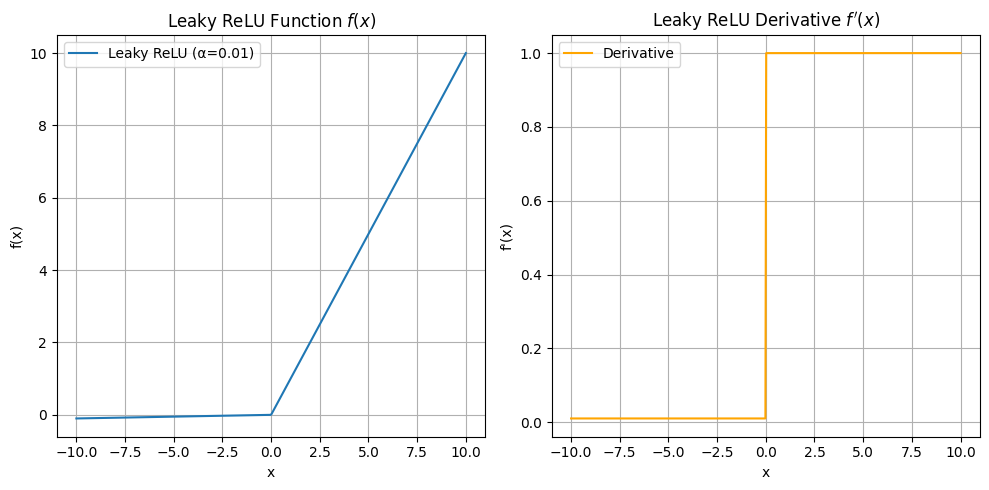

In [5]:
# 💧 Leaky ReLU 激活函数实现与可视化

import numpy as np
import matplotlib.pyplot as plt

# ✅ 正向传播
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# ✅ 反向传播（导数）
def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1.0, alpha)

# 🎨 可视化
x = np.linspace(-10, 10, 500)
alpha = 0.01
y = leaky_relu(x, alpha)
dy = leaky_relu_derivative(x, alpha)

plt.figure(figsize=(10, 5))

# Leaky ReLU 曲线
plt.subplot(1, 2, 1)
plt.plot(x, y, label=f'Leaky ReLU (α={alpha})')
plt.title("Leaky ReLU Function $f(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()

# Leaky ReLU 导数曲线
plt.subplot(1, 2, 2)
plt.plot(x, dy, label="Derivative", color='orange')
plt.title("Leaky ReLU Derivative $f\'(x)$")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# 🧠 PReLU 激活函数（Parametric ReLU）

---

## 📌 简介

PReLU 是 Leaky ReLU 的扩展形式，它将负区间的斜率 $\alpha$ 设为**可学习的参数**，由模型训练自动决定。  
该方法由何恺明在 ImageNet Classification with Deep Convolutional Neural Networks 中提出，常用于深层卷积神经网络（CNN）中。

---

## 📐 数学定义

PReLU 定义如下：

$$
f(x) =
\begin{cases}
x & \text{if } x > 0 \\\\
\alpha x & \text{if } x \leq 0
\end{cases}
$$

但此处 $\alpha$ 不是固定常数，而是模型训练的一部分参数。

---

## ✏️ 导数推导

与 Leaky ReLU 相同，导数分段为：

$$
f'(x) =
\begin{cases}
1 & x > 0 \\\\
\alpha & x \leq 0
\end{cases}
$$

在训练时，对 $\alpha$ 的导数也需要计算并更新。

---

## 📊 特性分析

| 属性             | 是否满足 |
|------------------|----------|
| 非线性           | ✅        |
| 单调性           | ✅        |
| 可导性           | 分段可导  |
| 输出范围         | $(-\infty, \infty)$ |
| 稀疏性           | ❌        |
| 参数可学习       | ✅        |
| 适配能力强       | ✅        |

---

## 👍 优点

- 自动学习最优的负斜率，提升表达能力
- 适应不同神经元或不同层的特性，性能更强
- 在图像分类任务中有显著改进

---

## 👎 缺点

- 增加参数（每个神经元一个 $\alpha$）
- 易过拟合，尤其在小数据集上
- 实现较复杂，需额外梯度计算

---

## 🧭 常见用途

| 用法     | 场景                          |
|----------|-------------------------------|
| 替代 Leaky ReLU | 增强灵活性                 |
| 深层 CNN | 图像分类（如 ResNet）         |

---

## 💬 常见面试问题

1. **PReLU 和 Leaky ReLU 的最大区别是什么？**
   - Leaky ReLU 的负斜率是固定常数，PReLU 则是**可学习参数**。

2. **PReLU 会不会导致过拟合？**
   - 是的，它引入了更多参数，尤其在小模型或小数据集上需要注意。

3. **PReLU 的参数是全局共享的吗？**
   - 可以是每个神经元一个，也可以按通道共享；具体取决于实现。

4. **如何训练 PReLU 的 $\alpha$？**
   - 通过反向传播和梯度下降更新，和其他网络参数一起训练。

---


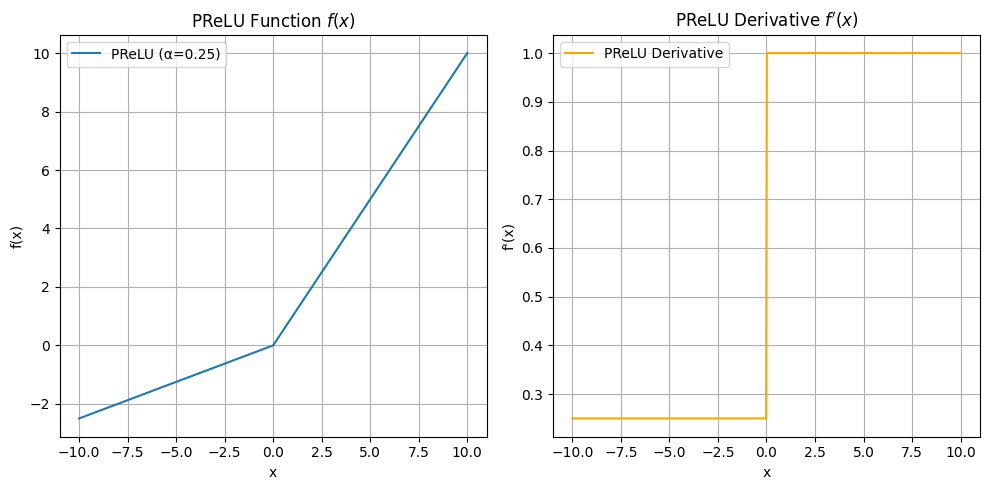

In [6]:
# ⚙️ PReLU 激活函数实现与可视化

import numpy as np
import matplotlib.pyplot as plt

# ✅ 正向传播（α 可调）
def prelu(x, alpha=0.25):  # 模拟 "learnable" α
    return np.where(x > 0, x, alpha * x)

# ✅ 反向传播（导数）
def prelu_derivative(x, alpha=0.25):
    return np.where(x > 0, 1.0, alpha)

# 🎨 可视化
x = np.linspace(-10, 10, 500)
alpha = 0.25
y = prelu(x, alpha)
dy = prelu_derivative(x, alpha)

plt.figure(figsize=(10, 5))

# PReLU 曲线
plt.subplot(1, 2, 1)
plt.plot(x, y, label=f'PReLU (α={alpha})')
plt.title("PReLU Function $f(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()

# PReLU 导数曲线
plt.subplot(1, 2, 2)
plt.plot(x, dy, label="PReLU Derivative", color='orange')
plt.title("PReLU Derivative $f\'(x)$")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# 🧠 ELU 激活函数（Exponential Linear Unit）

---

## 📌 简介

ELU 是一种改进型激活函数，旨在结合 ReLU 的优点（非线性、高效）和 Tanh 的优点（中心化输出）。  
它在 $x<0$ 区间使用指数函数，从而使输出更平滑、梯度传播更稳定，同时减轻死亡神经元问题。

---

## 📐 数学定义

ELU 定义如下，$\alpha$ 是一个正数（如 1.0）：

$$
f(x) =
\begin{cases}
x & x > 0 \\\\
\alpha (e^x - 1) & x \leq 0
\end{cases}
$$

---

## ✏️ 导数推导

对应导数为：

$$
f'(x) =
\begin{cases}
1 & x > 0 \\\\
f(x) + \alpha & x \leq 0
\end{cases}
$$

---

## 📊 特性分析

| 属性             | 是否满足 |
|------------------|----------|
| 非线性           | ✅        |
| 单调性           | ✅        |
| 可导性           | ✅（光滑） |
| 输出范围         | $(-\alpha, \infty)$ |
| 输出是否中心化   | ✅        |
| 稀疏性           | ❌        |
| 梯度消失风险     | ✅（低）  |

---

## 👍 优点

- 在负区间有非零输出，避免死神经元问题
- 输出接近 0，有助于模型收敛
- 平滑连续，有利于梯度传播
- 比 ReLU 更稳定，训练收敛更快

---

## 👎 缺点

- 计算成本略高于 ReLU（指数运算）
- 需设定超参数 $\alpha$
- 对 $\alpha$ 过于敏感可能影响性能

---

## 🧭 常见用途

| 用法     | 场景                                  |
|----------|---------------------------------------|
| 替代 ReLU | 更平滑且稳定的训练                   |
| 深层网络 | 在归一化网络或归一化数据上表现良好    |

---

## 💬 常见面试问题

1. **ELU 和 ReLU 有什么区别？**
   - ELU 在负区间不是恒为 0，而是带负值的指数函数，输出更平滑、中心化。

2. **ELU 为什么能加快训练收敛？**
   - 因为输出中心化，梯度传播稳定，能缓解梯度消失。

3. **ELU 有哪些变体？**
   - SELU（自归一化 ELU），在特定初始化和归一化条件下具有归一化能力。

4. **何时使用 ELU？**
   - 网络比较深、对稳定训练要求高时，可以优先考虑 ELU 而不是 ReLU。

---


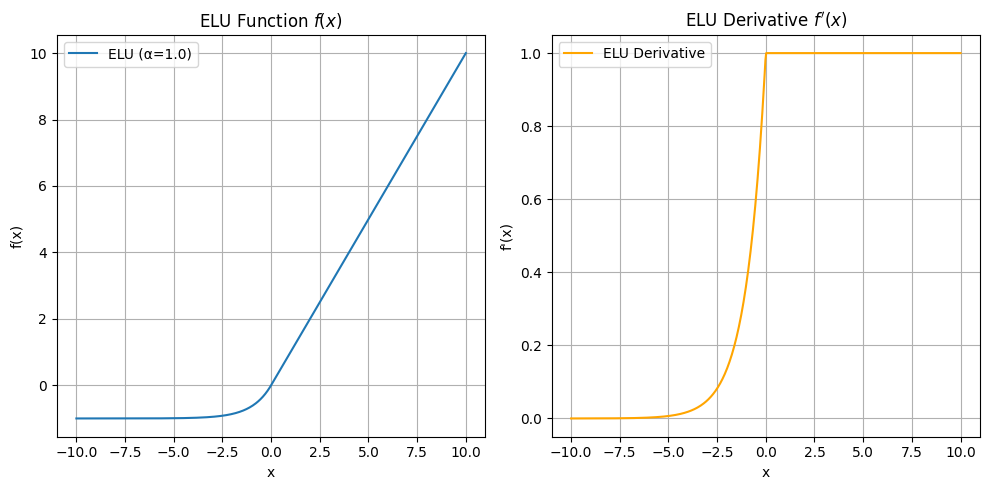

In [7]:
# ⚡ ELU 激活函数实现与可视化

import numpy as np
import matplotlib.pyplot as plt

# ✅ 正向传播
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

# ✅ 反向传播（导数）
def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1.0, elu(x, alpha) + alpha)

# 🎨 可视化
x = np.linspace(-10, 10, 500)
alpha = 1.0
y = elu(x, alpha)
dy = elu_derivative(x, alpha)

plt.figure(figsize=(10, 5))

# ELU 曲线
plt.subplot(1, 2, 1)
plt.plot(x, y, label=f'ELU (α={alpha})')
plt.title("ELU Function $f(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()

# ELU 导数曲线
plt.subplot(1, 2, 2)
plt.plot(x, dy, label="ELU Derivative", color='orange')
plt.title("ELU Derivative $f\'(x)$")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# 🧠 SELU 激活函数（Scaled Exponential Linear Unit）

---

## 📌 简介

SELU 是 ELU 的改进版，全称为 **“缩放指数线性单元”**，其核心目标是实现**自归一化（Self-Normalizing Neural Networks）**：  
即在神经网络中自动保持激活值的零均值和单位方差，从而加速训练并提高稳定性。

该函数由 Google Brain 提出，并用于构建 **无需显式 BatchNorm 的深层网络**。

---

## 📐 数学定义

SELU 定义如下：

$$
f(x) =
\lambda \cdot
\begin{cases}
x & \text{if } x > 0 \\\\
\alpha (e^x - 1) & \text{if } x \leq 0
\end{cases}
$$

其中：
- $\alpha \approx 1.6733$
- $\lambda \approx 1.0507$

---

## ✏️ 导数推导

SELU 的导数为：

$$
f'(x) =
\begin{cases}
\lambda & x > 0 \\\\
\lambda \cdot \alpha \cdot e^x & x \leq 0
\end{cases}
$$

或者简写为：

$$
f'(x) =
\begin{cases}
\lambda & x > 0 \\\\
f(x) + \lambda \cdot \alpha & x \leq 0
\end{cases}
$$

---

## 📊 特性分析

| 属性             | 是否满足 |
|------------------|----------|
| 非线性           | ✅        |
| 单调性           | ✅        |
| 可导性           | ✅（光滑） |
| 输出是否归一化   | ✅（自动） |
| 训练是否稳定     | ✅        |
| 是否需 BN 层     | ❌（无需）|
| 是否需特殊初始化 | ✅（需） |

---

## 👍 优点

- 激活值自动归一化为 0 均值和单位方差
- 无需显式使用 Batch Normalization
- 稳定深层网络训练，减少梯度爆炸/消失

---

## 👎 缺点

- 对权重初始化和网络结构要求严格（必须用 `LeCun Normal`）
- 不适合与 BatchNorm、Dropout 混用
- 超参数固定，不可调

---

## 🧭 常见用途

| 用法     | 场景                                      |
|----------|-------------------------------------------|
| 替代 ReLU / ELU | 构建自归一化神经网络                     |
| 无 BatchNorm | 训练更快、结构更简单的网络                 |
| 深层前馈网络 | 文本分类、时间序列等（MLP 比较常见）      |

---

## 💬 常见面试问题

1. **SELU 和 ELU 有什么区别？**
   - SELU 是带缩放因子的 ELU，输出自动归一化，无需使用 BatchNorm。

2. **SELU 训练时要注意什么？**
   - 权重初始化必须用 `LeCun Normal`；不能和 BatchNorm、Dropout 一起用。

3. **SELU 为什么能实现自归一化？**
   - 通过特殊的 $\alpha$ 与 $\lambda$，使得每层输出趋于 0 均值和 1 方差。

4. **哪些模型适合用 SELU？**
   - MLP 或无 BatchNorm 的深层网络，尤其在结构比较规整的任务中。

---


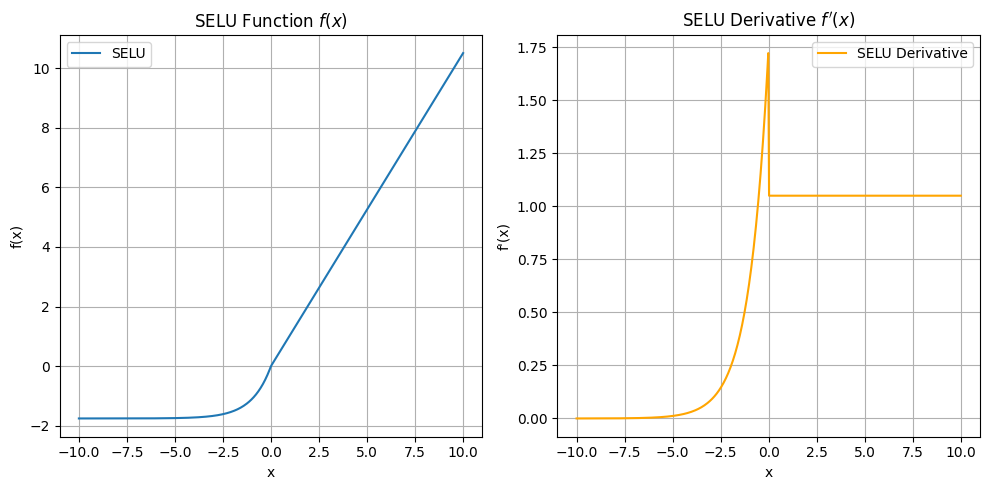

In [8]:
# 🔧 SELU 激活函数实现与可视化

import numpy as np
import matplotlib.pyplot as plt

# 常数：来自原论文 Self-Normalizing Neural Networks
alpha = 1.6732632423543772
scale = 1.0507009873554805

# ✅ 正向传播
def selu(x):
    return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))

# ✅ 反向传播（导数）
def selu_derivative(x):
    return np.where(x > 0,
                    scale,
                    scale * alpha * np.exp(x))

# 🎨 可视化
x = np.linspace(-10, 10, 500)
y = selu(x)
dy = selu_derivative(x)

plt.figure(figsize=(10, 5))

# SELU 函数图像
plt.subplot(1, 2, 1)
plt.plot(x, y, label='SELU')
plt.title("SELU Function $f(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()

# SELU 导数图像
plt.subplot(1, 2, 2)
plt.plot(x, dy, label="SELU Derivative", color='orange')
plt.title("SELU Derivative $f\'(x)$")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# 🧠 GELU 激活函数（Gaussian Error Linear Unit）

---

## 📌 简介

GELU 是一种新一代激活函数，由 Google 提出，广泛用于 BERT、GPT、Transformer 等大型预训练模型中。  
它将激活函数设计为一种**高斯误差函数形式的概率门控机制**，相比 ReLU 更平滑、更接近 dropout 的思想。

简言之：**GELU ≈ 用输入值乘以保留概率，来决定该激活值是否传递**。

---

## 📐 数学定义

标准定义为：

$$
f(x) = x \cdot \Phi(x) = x \cdot \frac{1}{2} \left[1 + \text{erf}\left(\frac{x}{\sqrt{2}}\right)\right]
$$

其中 $\Phi(x)$ 是标准正态分布的累积分布函数，$\text{erf}$ 是误差函数。

---

## ✏️ 近似计算公式（常用）

实际实现中常用以下近似形式（性能更好）：

$$
\text{GELU}(x) \approx 0.5 x \left[1 + \tanh\left(\sqrt{\frac{2}{\pi}} (x + 0.044715 x^3)\right) \right]
$$

---

## 📊 特性分析

| 属性             | 是否满足 |
|------------------|----------|
| 非线性           | ✅        |
| 光滑性           | ✅（非常平滑） |
| 可导性           | ✅        |
| 输出范围         | $\mathbb{R}$（但多数集中在 $(-1.5, 1.5)$） |
| 稀疏性           | ❌（没有硬零） |
| 是否中心化       | ✅        |
| 梯度消失风险     | ❌ 极小     |

---

## 👍 优点

- 近似于 dropout 的效果，更自然地保留或抑制神经元
- 平滑、可导，避免 ReLU 的硬切割和死神经元
- 在大模型中具有更好的训练效果

---

## 👎 缺点

- 计算复杂度略高（涉及 $\tanh$ 或 $\text{erf}$）
- 不如 ReLU 那么稀疏
- 不适用于所有任务（小模型性能提升不明显）

---

## 🧭 常见用途

| 用法     | 场景                           |
|----------|--------------------------------|
| Transformer | BERT, GPT, T5 等语言模型中隐藏层 |
| 取代 ReLU   | 想要平滑激活、避免梯度突变的情况 |

---

## 💬 常见面试问题

1. **GELU 与 ReLU 的最大区别是什么？**
   - ReLU 是硬切割，GELU 是基于高斯概率的软门控，激活更平滑。

2. **GELU 为什么在 BERT 中表现好？**
   - 它的平滑概率性质有助于建模复杂的上下文关系。

3. **GELU 有哪些缺点？**
   - 计算成本较高，在小模型中可能性价比不高。

4. **GELU 有哪些实现方式？**
   - 可使用 $\text{erf}$ 的精确公式，或 $\tanh$ 的快速近似。

---


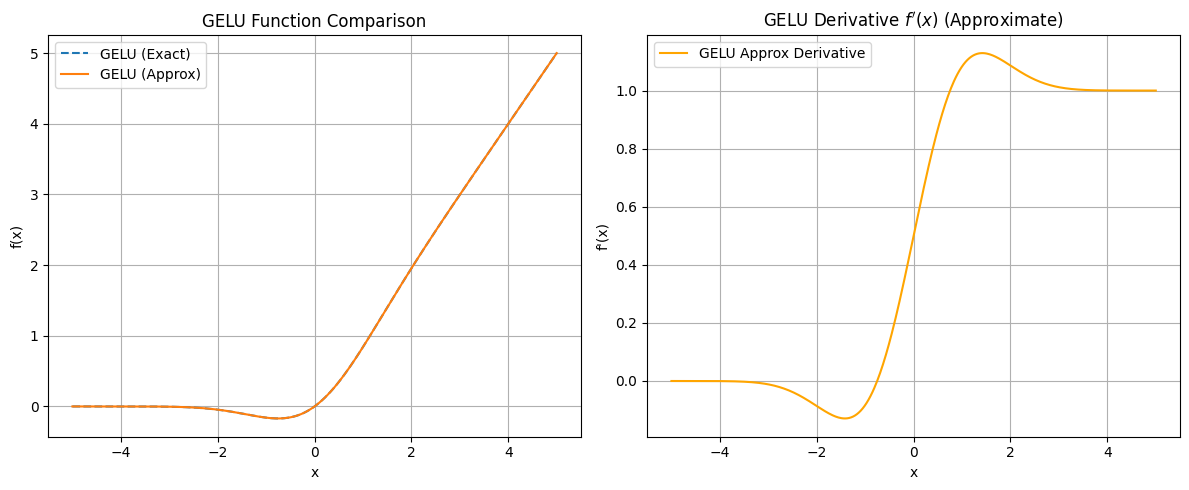

In [9]:
# 🧠 GELU 激活函数实现与可视化

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

# ✅ 精确实现（erf 形式）
def gelu_exact(x):
    return 0.5 * x * (1 + erf(x / np.sqrt(2)))

# ✅ 近似实现（使用 tanh）
def gelu_approx(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3)))

# ✅ GELU 近似导数（数值估计）
def gelu_approx_derivative(x, eps=1e-5):
    return (gelu_approx(x + eps) - gelu_approx(x - eps)) / (2 * eps)

# 🎨 可视化
x = np.linspace(-5, 5, 500)
y_exact = gelu_exact(x)
y_approx = gelu_approx(x)
dy_approx = gelu_approx_derivative(x)

plt.figure(figsize=(12, 5))

# GELU 函数对比图
plt.subplot(1, 2, 1)
plt.plot(x, y_exact, label='GELU (Exact)', linestyle='--')
plt.plot(x, y_approx, label='GELU (Approx)')
plt.title("GELU Function Comparison")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()

# GELU 近似导数图
plt.subplot(1, 2, 2)
plt.plot(x, dy_approx, label="GELU Approx Derivative", color='orange')
plt.title("GELU Derivative $f\'(x)$ (Approximate)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# 🧠 Swish 激活函数（Self-Gated Linear Unit）

---

## 📌 简介

Swish 是 Google 提出的新型激活函数，其定义非常简单：

$$
f(x) = x \cdot \sigma(x)
$$

即输入乘以其 sigmoid，形成“自门控”机制。  
Swish 兼具 ReLU 的高效性与 Sigmoid 的平滑性，在大多数深度网络任务中（如图像、语言）都优于 ReLU。

---

## 📐 数学定义

$$
\text{Swish}(x) = x \cdot \sigma(x) = \frac{x}{1 + e^{-x}}
$$

---

## ✏️ 导数推导

Swish 的导数如下：

$$
f'(x) = \sigma(x) + x \cdot \sigma(x) \cdot (1 - \sigma(x))
$$

由于公式复杂，在实际中常使用自动求导（如 PyTorch/TensorFlow），手写训练较少。

---

## 📊 特性分析

| 属性             | 是否满足 |
|------------------|----------|
| 非线性           | ✅        |
| 可导性           | ✅（光滑） |
| 输出范围         | $(-\infty, \infty)$ |
| 是否稀疏         | ❌（非硬0） |
| 是否中心化       | ✅（更偏0） |
| 梯度消失风险     | ❌（极低） |

---

## 👍 优点

- 更平滑、无“死神经元”问题
- 在大规模任务中通常比 ReLU 表现更好
- 自门控机制使其更具表达能力

---

## 👎 缺点

- 计算复杂度稍高（含 sigmoid）
- 在小模型或资源受限场景下可能不如 ReLU 快
- 导数形式复杂，不适合手动训练框架

---

## 🧭 常见用途

| 用法     | 场景                                  |
|----------|---------------------------------------|
| 替代 ReLU | 深度 CNN、Transformer、AutoML 等        |
| 大规模任务 | 图像识别、语言建模、搜索推荐等        |

---

## 💬 常见面试问题

1. **Swish 和 ReLU 有什么不同？**
   - ReLU 是硬截断，Swish 是自门控（$x \cdot \sigma(x)$），更平滑、没有死区。

2. **Swish 为什么性能更好？**
   - 因为它在负值区间保留微弱激活，同时保持梯度流动，不会突然为 0。

3. **Swish 的缺点是什么？**
   - 比 ReLU 慢（因为涉及 sigmoid），结构复杂，不适合低资源设备。

4. **Swish 会被哪些函数替代或改进？**
   - Mish 是它的改进版本，在负值区域更平滑。

---


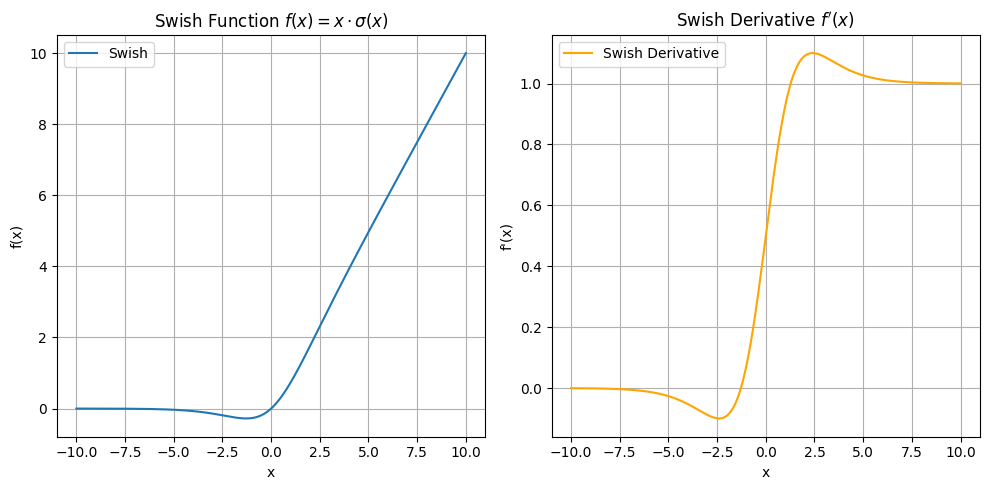

In [10]:
# ⚡ Swish 激活函数实现与可视化

import numpy as np
import matplotlib.pyplot as plt

# ✅ 正向传播
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def swish(x):
    return x * sigmoid(x)

# ✅ 导数（显式表达式）
def swish_derivative(x):
    sig = sigmoid(x)
    return sig + x * sig * (1 - sig)

# 🎨 可视化
x = np.linspace(-10, 10, 500)
y = swish(x)
dy = swish_derivative(x)

plt.figure(figsize=(10, 5))

# Swish 函数图像
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Swish')
plt.title("Swish Function $f(x) = x \\cdot \\sigma(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()

# Swish 导数图像
plt.subplot(1, 2, 2)
plt.plot(x, dy, label="Swish Derivative", color='orange')
plt.title("Swish Derivative $f\'(x)$")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## 🧾 激活函数属性对比表

| 函数        | 非线性 | 可导性       | 输出范围              | 稀疏性           | 是否中心化   | 梯度消失风险   |
|-------------|--------|--------------|-----------------------|------------------|----------------|----------------|
| Sigmoid     | ✅      | ✅（光滑）    | (0, 1)                | ❌（无硬 0）      | ❌（偏正）     | 🟥 高           |
| Tanh        | ✅      | ✅（光滑）    | (−1, 1)               | ❌（非稀疏）      | ✅             | 🟨 中           |
| ReLU        | ✅      | ❌（x=0 不可导）| [0, ∞)              | ✅（x<0 为 0）    | ❌             | 🟩 低，死神经元 |
| Leaky ReLU  | ✅      | ❌（分段）    | (−∞, ∞)              | ❌（非稀疏）      | ❌             | ✅（很低）      |
| PReLU       | ✅      | ❌（分段）    | (−∞, ∞)              | ❌               | ❌             | ✅（低）        |
| ELU         | ✅      | ✅（光滑）    | (−α, ∞)              | ❌               | ✅             | ✅（低）        |
| SELU        | ✅      | ✅（光滑）    | (−∞, ∞)              | ❌               | ✅             | ❌（自动归一）  |
| GELU        | ✅      | ✅（光滑）    | (−∞, ∞)              | ❌               | ✅             | ❌（极低）      |
| Swish       | ✅      | ✅（光滑）    | (−∞, ∞)              | ❌               | ✅             | ❌（极低）      |
